# Ask 
1. Trends in smart device usage
2. How these trends apply in Bellabeat customers
3. How these trends would help Bellabeat marketing strategy

# Prepare
Prepare packages

In [1]:
library("tidyverse")
library("janitor")
library("skimr")
library("lubridate")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Import data and take a look at overview (We are using data from `April 12th, 2016` ~ `May 12th, 20`)

In [2]:
daily_activity = read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep = read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_calories = read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
weight_log = read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heartrate = read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourly_intensity = read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

In [3]:
# glimpse(daily_activity)
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


We can see that every data can be grouped by `Id`

In [4]:
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(hourly_calories$Id)
n_distinct(weight_log$Id)
n_distinct(heartrate$Id)
n_distinct(hourly_intensity$Id)

[1] 33

[1] 24

[1] 33

[1] 8

[1] 14

[1] 33

### Number of participants for each data
- daily_acticity: 33
- daily_sleep: 24
- hourly_calories: 33
- weight_log: 8
- heartrate: 14
- hourly_intensity: 33

# Process


## Fixing column names
I felt the need to make column names *consistent*. (lowercase, snake_case)   
`janitor` package can be used. 

In [5]:
# janitor package
daily_activity <- clean_names(daily_activity)
daily_sleep <- clean_names(daily_sleep)
hourly_calories <- clean_names(hourly_calories)
weight_log <- clean_names(weight_log)
heartrate <- clean_names(heartrate)
hourly_intensity <- clean_names(hourly_intensity)

# rename date names into "date" 
daily_activity <- daily_activity %>% rename(date=activity_date)
daily_sleep <- daily_sleep %>% rename(date=sleep_day)
hourly_calories <- hourly_calories %>% rename(date=activity_hour)
heartrate <- heartrate %>% rename(date=time)
hourly_intensity <- hourly_intensity %>% rename(date=activity_hour)

## Date Formatting
Taking a look at data in Spreadsheet, I have noticed that date formats vary.   
To work with these data, I need to convert date into one same format. I will use **(YYYY/mm/dd HH:MM)** format.    
`lubridate` package will be handy.

In [6]:
#daily_activity, daily_sleep, hourly_calories, weight_log 
# Changing the column to Date object. Then, format 
daily_activity$date <- mdy(daily_activity$date)
daily_activity$date <- format(daily_activity$date, "%Y/%m/%d")

daily_sleep$date <- mdy_hms(daily_sleep$date)
daily_sleep$date <- format(daily_sleep$date, "%Y/%m/%d") # omit time 

hourly_calories$date <- mdy_hms(hourly_calories$date)
hourly_calories$date <- format(hourly_calories$date, "%Y/%m/%d %H:%M")

weight_log$date <- mdy_hms(weight_log$date)
weight_log$date <- format(weight_log$date, "%Y/%m/%d") # omit time because the weight is logged daily

heartrate$date <- mdy_hms(heartrate$date)
heartrate$date <- format(heartrate$date, "%Y/%m/%d %H:%M")

hourly_intensity$date <- mdy_hms(hourly_intensity$date)
hourly_intensity$date <- format(hourly_intensity$date, "%Y/%m/%d %H:%M")

# Analyze

## Total Steps vs Calories burnt
See the relationship between `total_steps` and `calories`.  
Analyze the trend

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


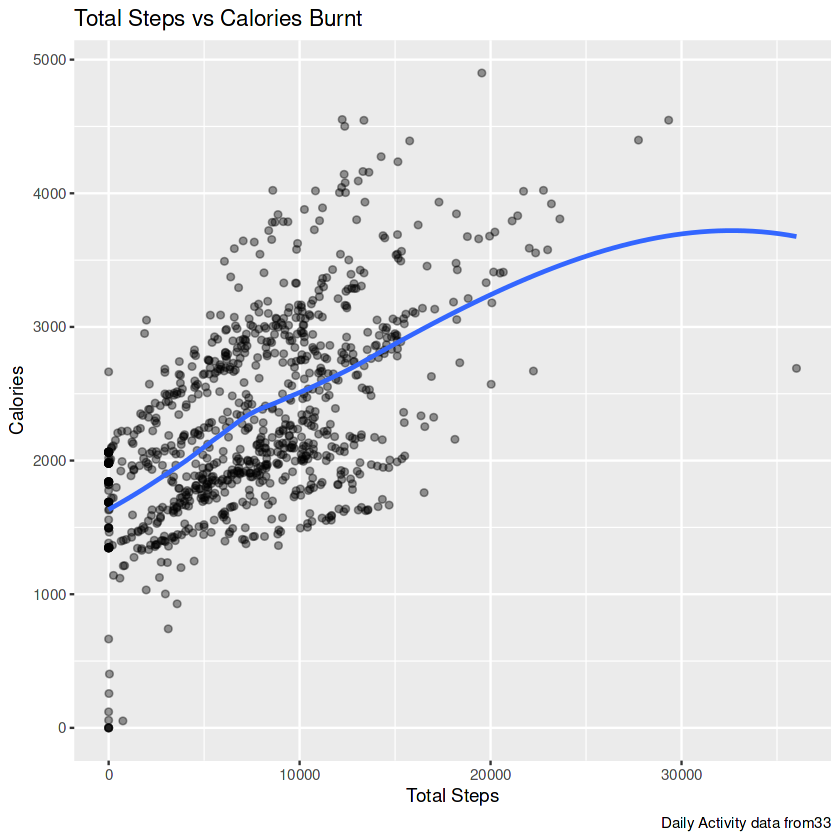

In [7]:
ggplot(daily_activity, aes(x=total_steps, y=calories)) +
  geom_point(alpha=0.4) +
  geom_smooth(se=FALSE) +
  labs(title="Total Steps vs Calories Burnt", x="Total Steps", y="Calories", 
       caption=paste0("Daily Activity data from", n_distinct(daily_activity$id)))

More total steps, more calories burnt. Which is obvious

## Daily Activity vs Weight Log by each participant

Merge data to visualize.  
The merged data has `8` participants because `weight_log` consists of only `8` participants.

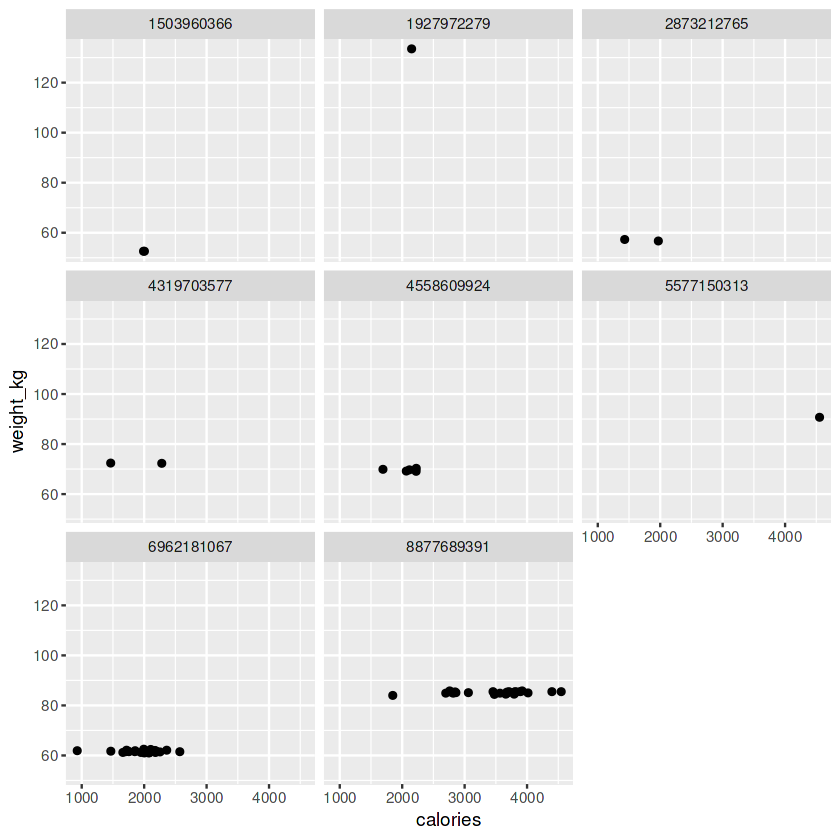

In [8]:
merged_data <- daily_activity %>% inner_join(weight_log, by=c("id", "date"))
# head(merged_data)
ggplot(merged_data, aes(x=calories, y=weight_kg)) +
  geom_point() + 
  facet_wrap(~id)

Due to limited size of data, two variables do not show noticeable relationship

## Time in Bed vs Time Asleep

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


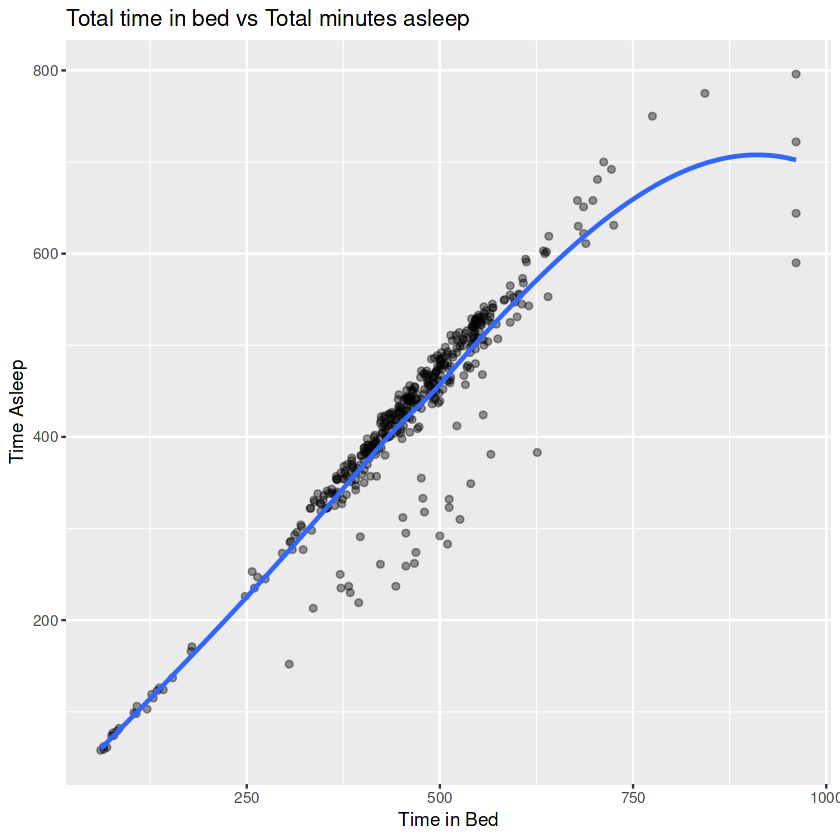

In [9]:
ggplot(daily_sleep, aes(x=total_time_in_bed, y=total_minutes_asleep)) + 
  geom_point(alpha=0.4) +
  geom_smooth(se=FALSE) +
  labs(title="Total time in bed vs Total minutes asleep", x="Time in Bed", y="Time Asleep")

The more people spend time in bed, the more they are asleep. 

## Heart Rate vs Workout Intensity

Merge these two data: `heartrate` & `hourly_intensity`  
Drop rows with invalid entries. 

In [10]:
merged_data_2 = heartrate %>% inner_join(hourly_intensity, by=c("id", "date"))
merged_data_2_clean <- drop_na(merged_data_2)
# head(merged_data_2)
n_distinct(merged_data_2_clean$id)
glimpse(merged_data_2_clean)

[1] 14

Rows: 41,697
Columns: 5
$ id                <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ date              <chr> "2016/04/12 08:00", "2016/04/12 08:00", "2016/04/12 …
$ value             <int> 106, 103, 106, 110, 112, 111, 108, 106, 105, 65, 64,…
$ total_intensity   <int> 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, …
$ average_intensity <dbl> 0.216667, 0.216667, 0.216667, 0.216667, 0.216667, 0.…


There are 14 participants that appear in both `hourly_intensity` and `hourly_intensity` data.   
There are total `41,697` data for all `14` participants.

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


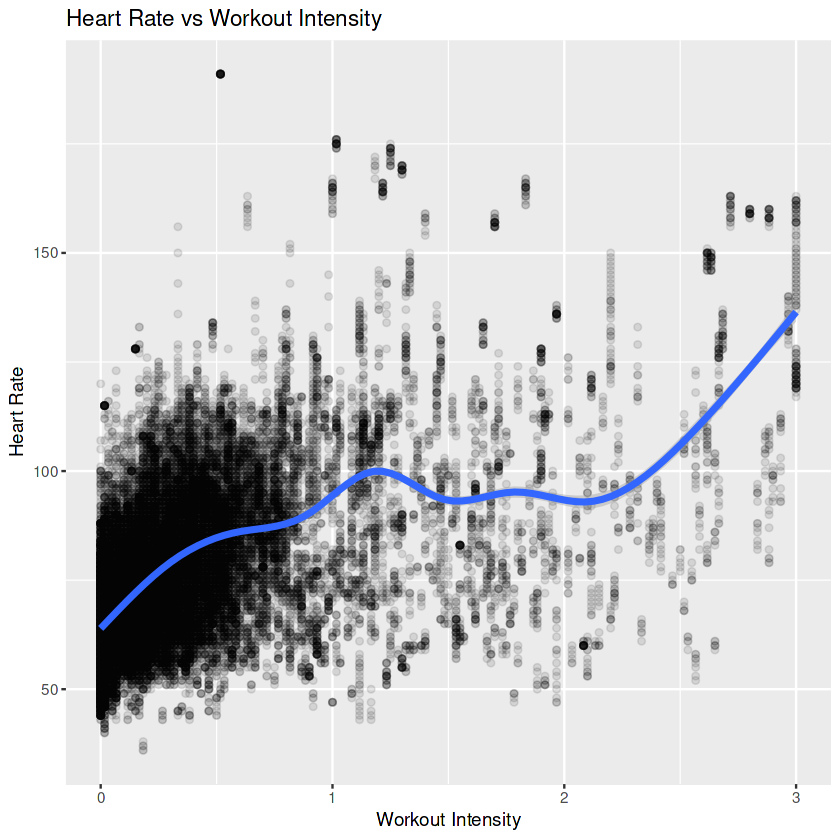

In [11]:
ggplot(data=merged_data_2_clean, aes(x=average_intensity, y=value)) +
  geom_point(alpha=0.1) +
  geom_smooth(method="gam", linewidth=1.5) + 
  labs(title="Heart Rate vs Workout Intensity", x="Workout Intensity", y="Heart Rate")

While the graph shows some outliers, it shows positive relationship between the two variables.   
The higher workout intensity, the higher the heart rate.

## When do people usually workout?
We can find out by visualizing `hourly_intensity` data.

time_only,intensity_mean
<chr>,<dbl>
00:00,0.035492524
01:00,0.023651328
02:00,0.017399091
03:00,0.007395519
04:00,0.010550802
05:00,0.082510751


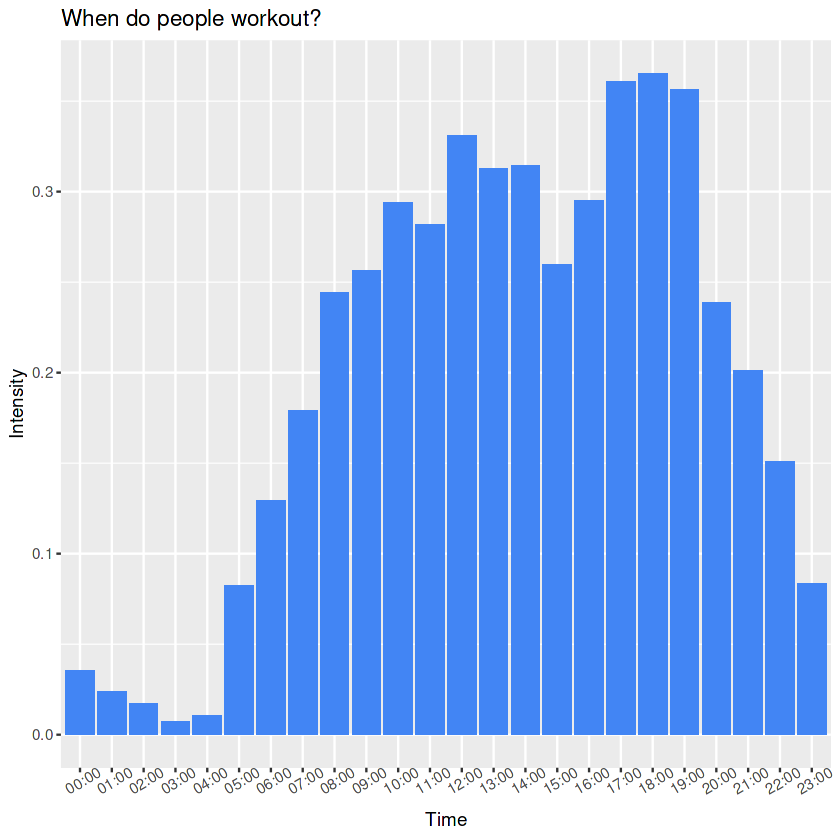

In [12]:
hourly_intensity <- hourly_intensity %>% mutate(time_only = format(ymd_hm(hourly_intensity$date), "%H:%M"))
hourly_intensity_mean <- hourly_intensity %>% 
  group_by(time_only) %>%
  summarize(intensity_mean = mean(average_intensity))
# head(hourly_intensity)
head(hourly_intensity_mean)

ggplot(data=hourly_intensity_mean, aes(x=time_only, y=intensity_mean)) + 
  geom_col(fill="#4285F4") +
  labs(title="When do people workout?", x="Time", y="Intensity") +
  theme(axis.text.x=element_text(angle=30))

Peak time for working out is: `11:00~13:00` and `17:00~19:00`   

# Recommendations

- It seems like people like to workout during lunch break (`11:00~13:00`) or after work (`17:00~19:00`)
  - Suggest customers to workout during this time via notification.
- When the detected heart rate is above normal, the device can infer that the user is working out with too much intensity.
  - In workout summary, suggest better workout condition.